### Import Modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.metrics.pairwise import cosine_similarity

## Import the training set

In [3]:
train = pd.read_csv("geotrain.csv",sep = ",", na_values = ["?"])

In [4]:
train.shape

(913489, 47)

## Import the testing set

In [5]:
test = pd.read_csv("geotest.csv",sep = ",", na_values = ["?"])

In [6]:
test.shape

(261011, 47)

## Create the data frame using features from feature selection - Training

In [7]:
train_feature = train[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]

In [8]:
train_feature.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural,inf_adj_salary
0,1,11,1.0,1.0,4,0,-3,73051.933702,19711,1,4095.000000
1,9,44,38.0,38.0,4,0,-1,40437.266151,24224,1,14493.885389
2,9,38,38.0,38.0,4,0,-1,35437.889054,23424,1,17687.340666
3,9,100,37.0,37.0,4,0,6,22113.411765,20630,1,77116.444444
4,9,63,33.0,37.0,4,0,9,50011.637573,72770,1,28319.438790
5,9,50,3.0,30.0,4,0,-1,53162.430939,74201,1,28551.600000
6,12,100,1.0,1.0,4,0,-3,442025.544703,804562,0,51531.040807
7,9,60,8.0,28.0,4,0,-1,38815.311968,3564,0,32131.047565
8,9,33,37.0,37.0,5,0,9,38183.006536,33886,1,12850.348351
9,9,100,13.0,23.0,4,0,4,47317.356572,2866,1,23713.150024


### Training set predictors

In [9]:
train_x = train_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
train_x.shape

(913489, 10)

In [10]:
train_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,1,11,1.0,1.0,4,0,-3,73051.933702,19711,1
1,9,44,38.0,38.0,4,0,-1,40437.266151,24224,1
2,9,38,38.0,38.0,4,0,-1,35437.889054,23424,1
3,9,100,37.0,37.0,4,0,6,22113.411765,20630,1
4,9,63,33.0,37.0,4,0,9,50011.637573,72770,1
5,9,50,3.0,30.0,4,0,-1,53162.430939,74201,1
6,12,100,1.0,1.0,4,0,-3,442025.544703,804562,0
7,9,60,8.0,28.0,4,0,-1,38815.311968,3564,0
8,9,33,37.0,37.0,5,0,9,38183.006536,33886,1
9,9,100,13.0,23.0,4,0,4,47317.356572,2866,1


### Training set labels

In [11]:
train_y = train_feature[['inf_adj_salary']]

In [12]:
train_y.head(10)

,inf_adj_salary
0,4095.000000
1,14493.885389
2,17687.340666
3,77116.444444
4,28319.438790
5,28551.600000
6,51531.040807
7,32131.047565
8,12850.348351
9,23713.150024


## Create the data frame using features from feature selection - testing

In [13]:
test_feature = test[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]

In [14]:
test_feature.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural,inf_adj_salary
0,10,100,17.0,17.0,1,0,9,266951.219512,829903,0,91345.060932
1,9,100,13.0,15.0,5,1,6,56940.790630,73724,0,75652.106667
2,10,100,5.0,5.0,4,0,6,113026.416819,97497,0,53400.540000
3,10,100,8.0,8.0,5,1,-3,73322.028673,10901,0,60649.723077
4,9,100,3.0,3.0,5,0,-1,40176.015474,26494,1,56093.878136
5,9,100,10.0,10.0,5,1,-1,40864.700030,90119,0,64073.573758
6,9,100,14.0,15.0,5,1,9,63528.416265,15980,0,65040.439130
7,10,100,2.0,2.0,4,0,-3,418316.748423,5025,0,68709.372968
8,9,100,23.0,23.0,4,0,-3,37912.310287,59320,1,41750.979354
9,9,100,4.0,4.0,5,1,9,24224.860706,99564,0,48750.995956


### Testing set predictors

In [15]:
test_x = test_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]

In [16]:
test_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,10,100,17.0,17.0,1,0,9,266951.219512,829903,0
1,9,100,13.0,15.0,5,1,6,56940.790630,73724,0
2,10,100,5.0,5.0,4,0,6,113026.416819,97497,0
3,10,100,8.0,8.0,5,1,-3,73322.028673,10901,0
4,9,100,3.0,3.0,5,0,-1,40176.015474,26494,1
5,9,100,10.0,10.0,5,1,-1,40864.700030,90119,0
6,9,100,14.0,15.0,5,1,9,63528.416265,15980,0
7,10,100,2.0,2.0,4,0,-3,418316.748423,5025,0
8,9,100,23.0,23.0,4,0,-3,37912.310287,59320,1
9,9,100,4.0,4.0,5,1,9,24224.860706,99564,0


### Testing set labels

In [17]:
test_y = test_feature[['inf_adj_salary']]

In [18]:
test_y.head(10)

,inf_adj_salary
0,91345.060932
1,75652.106667
2,53400.540000
3,60649.723077
4,56093.878136
5,64073.573758
6,65040.439130
7,68709.372968
8,41750.979354
9,48750.995956


## Fit a baseline model

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Initiate an instance 
rf = RandomForestRegressor(random_state = 42)

In [21]:
# print parameters currently in use
print('Parameters currenlty in use:\n')
print(rf.get_params())

Parameters currenlty in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [22]:
# Instantiate model 
rf0 = RandomForestRegressor(random_state=42,n_jobs=-1)

In [25]:
#Train the model on the training set
rf0.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
# Use the forest's prediction method on the trianing set
predict_train = rf0.predict(train_x)

In [27]:
# Use the forest's predict method on the test data
predictions = rf0.predict(test_x)

### Base line model Profermance

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

### Performance on the training

In [29]:
mae_base_train = mean_absolute_error(train_y,predict_train)
exVar_base_train = explained_variance_score(train_y,predict_train)
mse_base_train = mean_squared_error(train_y,predict_train)
rmse_base_train = np.sqrt(mse_base_train)

In [30]:
print("Using the base line Random forest model, The Mean Absolute Error on the testing set is {}".format(mae_base_train))
print("Using the base line Random forest model, The Mean Squared Error on the testing set is {}".format(mse_base_train))
print("Using the base line Random forest model, The Rooted Mean Squared Error on the testing set is {}".format(rmse_base_train))
print("Using the base line Random forest model, The explained variance score on the testing set is {}".format(exVar_base_train))

Using the base line Random forest model, The Mean Absolute Error on the testing set is 3236.2389976352624
Using the base line Random forest model, The Mean Squared Error on the testing set is 27190682.031607937
Using the base line Random forest model, The Rooted Mean Squared Error on the testing set is 5214.468528201885
Using the base line Random forest model, The explained variance score on the testing set is 0.9423677414382229


### Performance on the testing

In [33]:
mae_base = mean_absolute_error(test_y,predictions)
exVar_base = explained_variance_score(test_y,predictions)
mse_base = mean_squared_error(test_y,predictions)
rmse_base = np.sqrt(mse_base)

In [34]:
print("Using the base line Random forest model, The Mean Absolute Error on the testing set is {}".format(mae_base))
print("Using the base line Random forest model, The Mean Squared Error on the testing set is {}".format(mse_base))
print("Using the base line Random forest model, The Rooted Mean Squared Error on the testing set is {}".format(rmse_base))
print("Using the base line Random forest model, The explained variance score on the testing set is {}".format(exVar_base))

Using the base line Random forest model, The Mean Absolute Error on the testing set is 5716.412450464551
Using the base line Random forest model, The Mean Squared Error on the testing set is 70705405.0702005
Using the base line Random forest model, The Rooted Mean Squared Error on the testing set is 8408.650609354661
Using the base line Random forest model, The explained variance score on the testing set is 0.850532781494512


## The hyperparameters to tune
#### n_estimators = number of trees in the forest
#### max_features = Max number of features considered for splitting a node
#### max_depth = max number of levels in each Decision Tree
#### min_samples_split = minimum number of data points placed in a node before the node is split
#### min_samples_leaf = minimum number of data points allowed in a leaf node
#### bootstrap = method for sampling data points (with or without replacement)


In [24]:
import warnings
warnings.filterwarnings('ignore')

### Random Search Round 1

In [21]:
from sklearn.model_selection import RandomizedSearchCV

### n_estimators = number of trees in the forest

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1100, num = 11)]

### max_features = Max number of features considered for splitting a node

In [34]:
max_features = ['auto','sqrt']

### max_depth = max number of levels in each Decision Tree

In [35]:
max_depth = [int(x) for x in np.linspace(10,100, num = 10)]
max_depth.append(None)

In [36]:
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

### min_samples_split = minimum number of data points placed in a node before the node is split

In [37]:
min_samples_split = [100,1000,5000]

### min_samples_leaf = minimum number of data points allowed in a leaf node

In [39]:
min_samples_leaf = [100,900,9000]

### bootstrap = method for sampling data points (with or without replacement)

In [40]:
bootstrap = [True,False]

### Create the random grid

In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [100, 1000, 5000], 'min_samples_leaf': [100, 900, 9000], 'bootstrap': [True, False]}


In [43]:
rf = RandomForestRegressor()

In [44]:
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 5,
                               cv = 3,
                               verbose = 2,
                               random_state = 42,
                               n_jobs = -1)

In [47]:
# fit the random search model using the training set
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=50, bootstrap=True 
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=50, bootstrap=True 
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=50, bootstrap=True 
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=200, min_samples_split=5000, min_samples_leaf=100, max_features=sqrt, max_depth=50, bootstrap=False 
[CV] n_estimators=200, min_samples_split=5000, min_samples_leaf=100, max_features=sqrt, max_depth=50, bootstra

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 16.0min remaining: 14.0min


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=50, bootstrap=True, total=16.1min
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=30, bootstrap=True, total=20.2min
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=30, bootstrap=True, total=20.3min
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=9000, max_features=auto, max_depth=30, bootstrap=True, total=20.4min
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False, total=61.6min
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False, total=62.5min
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=100, max_features=auto, max_depth=90, bootstrap=False, total=63.4min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 64.8min finished


KeyboardInterrupt: 

In [46]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [52]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 100,
 'min_samples_leaf': 100,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [57]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
random_best= rf_random.best_estimator_

The first round of random serach failed. 

### Random Search Grid - rf_random1 (n_iter = 6, cv = 3) - Round 2

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
n_estimators

[50, 100, 150, 200, 250, 300]

In [70]:
max_features = [10,5]

In [71]:
max_depth = [int(x) for x in np.linspace(10,50, num = 5)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, None]

In [72]:
min_samples_split = [2,10]

In [73]:
min_samples_leaf = [1,10,100]

In [74]:
bootstrap = [True,False]

In [75]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': [10, 5], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 10, 100], 'bootstrap': [True, False]}


In [77]:
rf = RandomForestRegressor()

In [78]:
rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 6, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

In [79]:
train_x.shape, train_y.shape

((913489, 10), (913489, 1))

In [80]:
rf_random1.fit(train_x, train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=100, max_features=10, max_depth=20, bootstrap=True 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=100, max_features=10, max_depth=20, bootstrap=True 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=100, max_features=10, max_depth=20, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=None, bootstrap=False 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=None, bootstrap=False 
[CV] n_estimators=150, min_sample

[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed: 15.1min remaining: 15.1min


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=10, bootstrap=True, total=15.4min
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=10, bootstrap=True, total=15.5min
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=10, bootstrap=True, total=15.7min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False, total=19.3min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False, total=19.6min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=10, bootstrap=False, total=19.7min
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=100, max_features=10, max_depth=20, bootstrap=True, total=20.6min
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=100, max_features=10, max_depth=20, bootstr

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 21.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=6, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': [10, 5], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 10, 100], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [98]:
cvres = rf_random1.grid_scores_
cvres

[mean: -90243744.76774, std: 3365607.72418, params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 20, 'bootstrap': True},
 mean: -108507200.95770, std: 5064118.79627, params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 10, 'bootstrap': False},
 mean: -88183880.84315, std: 2693726.34955, params: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': None, 'bootstrap': False},
 mean: -75809075.78355, std: 2372091.93444, params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 40, 'bootstrap': True},
 mean: -90109561.00175, std: 3405974.13144, params: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 20, 'bootstrap': True},
 mean: -102640347.06506, std: 3569574.74400, params: {'n_estimators': 300, 'min_samples_split': 10

In [143]:
for i in range(0,6):
    print(np.sqrt(-(cvres[i][1])), cvres[i][0])

9499.670771544632 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 20, 'bootstrap': True}
10416.678979295684 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 10, 'bootstrap': False}
9390.627286989396 {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': None, 'bootstrap': False}
8706.840746422 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 40, 'bootstrap': True}
9492.6055960283 {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 20, 'bootstrap': True}
10131.157242144416 {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 10, 'bootstrap': True}


Best mean RMSE = 8706.840746422

### Check the best model parameters

In [105]:
rf_random1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [106]:
# best combination of parameters of random search
rf_random1.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 40,
 'bootstrap': True}

In [107]:
# Performance metrics
random_best= rf_random1.best_estimator_.predict(train_x)

### Performance on the testing

In [108]:
# Use the forest's predict method on the test data
predictions = rf_random1.best_estimator_.predict(test_x)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [110]:
mae_rand = mean_absolute_error(test_y,predictions)

In [111]:
exVar_rand = explained_variance_score(test_y,predictions)

In [112]:
mse_rand = mean_squared_error(test_y,predictions)

In [115]:
rmse_rand = np.sqrt(mse_rand)

### Performance on the testing set

In [316]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_rand))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_rand))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_rand))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(exVar_rand))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5834.592306251582
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 70315434.74257879
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 8385.42990803565
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8513279029023304


### Feature Importance

In [117]:
# extract the numerical values of feature importance from the random search
importances = rf_random1.best_estimator_.feature_importances_

In [119]:
feature_list = list(train_x.columns)

In [120]:
#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

In [121]:
#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

In [122]:
print(df)

   importance          feature
0    0.268005         dist_exp
1    0.177744        state_exp
2    0.118279    high_degre_cd
3    0.094154         mean inc
4    0.076232              fte
5    0.071367       Enrollment
6    0.070565            rural
7    0.057315        low_grade
8    0.034228  months_employed
9    0.032111       IL_adv_col


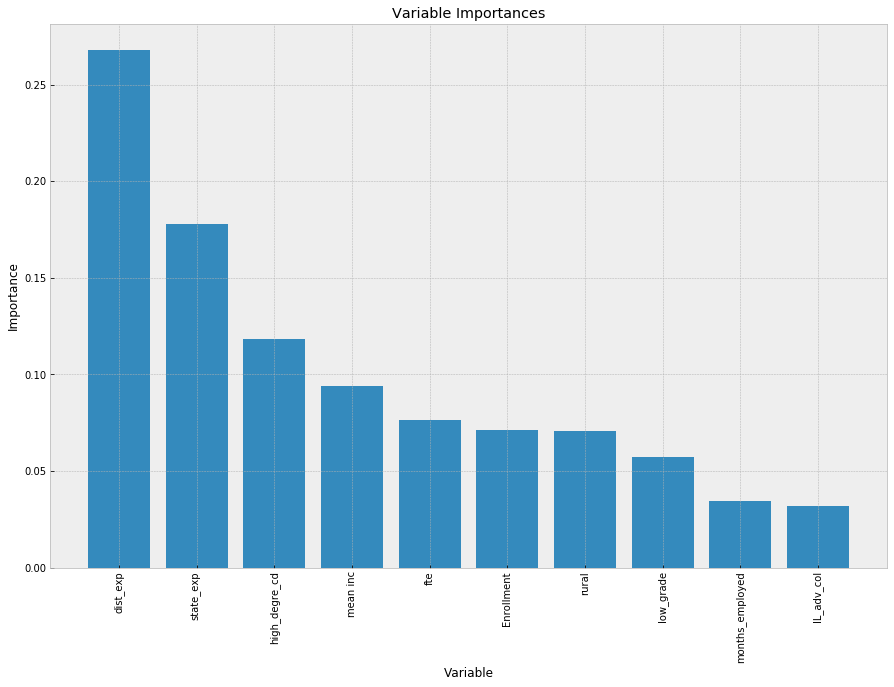

In [123]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart 
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Random Search Grid - rf_random2 (n_iter = 10, cv = 3) - Round 3

In [129]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 350, num = 10)]
n_estimators

[10, 47, 85, 123, 161, 198, 236, 274, 312, 350]

In [133]:
max_features = [3,5,10]

In [134]:
max_depth = [int(x) for x in np.linspace(10,60, num = 6)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, 60, None]

In [135]:
min_samples_split = [2,10,20]

In [136]:
min_samples_leaf = [1,10,100]

In [137]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [138]:
print(random_grid)

{'n_estimators': [10, 47, 85, 123, 161, 198, 236, 274, 312, 350], 'max_features': [3, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 10, 100], 'bootstrap': [True, False]}


In [139]:
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

In [140]:
rf_random2.fit(train_x, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=161, min_samples_split=20, min_samples_leaf=1, max_features=10, max_depth=50, bootstrap=False 
[CV] n_estimators=161, min_samples_split=20, min_samples_leaf=1, max_features=10, max_depth=50, bootstrap=False 
[CV] n_estimators=161, min_samples_split=20, min_samples_leaf=1, max_features=10, max_depth=50, bootstrap=False 
[CV] n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False 
[CV] n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False 
[CV] n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False 
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=10, max_features=3, max_depth=40, bootstrap=True 
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=10, max_features=3, max_depth=40, bootstrap=True 
[CV] n_estimators=10, min_samples

[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed: 16.6min remaining: 54.6min


[CV]  n_estimators=85, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=50, bootstrap=False, total=14.9min
[CV] n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False 
[CV]  n_estimators=85, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=50, bootstrap=False, total=15.3min
[CV] n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False 
[CV]  n_estimators=85, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=None, bootstrap=False, total=21.8min
[CV] n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False 
[CV]  n_estimators=85, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=None, bootstrap=False, total=21.3min
[CV]  n_estimators=85, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=None, bootstrap=False, total=22.0min
[CV]  n_estimators=198

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 41.2min remaining: 12.5min


[CV]  n_estimators=161, min_samples_split=20, min_samples_leaf=1, max_features=10, max_depth=50, bootstrap=False, total=40.8min
[CV]  n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False, total=26.6min
[CV]  n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False, total=26.7min
[CV]  n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features=3, max_depth=20, bootstrap=False, total=21.7min
[CV]  n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False, total=45.0min
[CV]  n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False, total=45.2min
[CV]  n_estimators=274, min_samples_split=20, min_samples_leaf=100, max_features=10, max_depth=60, bootstrap=False, total=45.5min


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 45.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 47, 85, 123, 161, 198, 236, 274, 312, 350], 'max_features': [3, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 10, 100], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

### Access the cross-validation results

In [141]:
cvres2 = rf_random2.grid_scores_

In [146]:
for i in range(0,10):
    print("RMSE = {}".format(np.sqrt(-(cvres2[i][1]))), 
          "Parameters = {}".format(cvres2[i][0]))

RMSE = 9356.322171402317 Parameters = {'n_estimators': 161, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 50, 'bootstrap': False}
RMSE = 9625.888391974187 Parameters = {'n_estimators': 274, 'min_samples_split': 20, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 60, 'bootstrap': False}
RMSE = 9135.388913602326 Parameters = {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 40, 'bootstrap': True}
RMSE = 8531.545538469452 Parameters = {'n_estimators': 161, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 10, 'max_depth': 50, 'bootstrap': True}
RMSE = 9135.388913602326 Parameters = {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 50, 'bootstrap': True}
RMSE = 8597.422090054157 Parameters = {'n_estimators': 198, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 50, 'bootstrap': True}
RMSE = 9625.888

Best Mean RMSE = 8531.545538469452

### Best combination of parameters of random search

In [147]:
rf_random2.best_params_

{'n_estimators': 161,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 10,
 'max_depth': 50,
 'bootstrap': True}

In [149]:
rf_random2.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=161, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Performance on the testing
### Use the forest's predict method on the test data

In [148]:
predictions_2 = rf_random2.best_estimator_.predict(test_x)

In [150]:
mae_rand_2 = mean_absolute_error(test_y,predictions_2)

In [151]:
exVar_rand_2 = explained_variance_score(test_y,predictions_2)

In [152]:
mse_rand_2 = mean_squared_error(test_y,predictions_2)

In [159]:
rmse_rand_2 = np.sqrt(mse_rand_2)

In [317]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_rand_2))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_rand_2))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_rand_2))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(exVar_rand_2))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5618.035517581957
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 67080977.88805025
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 8190.2977899494135
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8581678106346201


### Export the actual and prediction on the testing set for the best rf model

In [184]:
predictions_2.shape

(261011,)

In [192]:
predictions_2

array([83800.1293643 , 89770.19733361, 58742.09297341, ...,
       54970.96350767, 48634.71116404, 72463.1137142 ])

In [186]:
pred_y = predictions_2

In [318]:
pred_y = pd.DataFrame(pred_y)

In [207]:
test_result = pd.concat([test_y, pred_y], axis=1)

In [208]:
test_result.rename(columns={0 : 'pred_y'}, inplace=True)

In [210]:
test_result.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [319]:
test_result.head(10)

,actual_y,pred_y
0,91345.060932,83800.129364
1,75652.106667,89770.197334
2,53400.540000,58742.092973
3,60649.723077,63748.532661
4,56093.878136,59763.174705
5,64073.573758,72251.331841
6,65040.439130,78242.892933
7,68709.372968,48186.728223
8,41750.979354,55862.884460
9,48750.995956,54123.525987


In [212]:
test_result.to_csv("RF_model.csv")

### Feature Importance

In [161]:
# extract the numerical values of feature importance from the random search
importances_2 = rf_random2.best_estimator_.feature_importances_

In [162]:
#create a list of tuples
feature_importance_2= sorted(zip(importances_2, feature_list), reverse=True)

In [167]:
#create two lists from the previous list of tuples
df_2 = pd.DataFrame(feature_importance_2, columns=['importance', 'feature'])
importance_2= list(df_2['importance'])
feature_2= list(df_2['feature'])

In [168]:
print(df_2)

   importance          feature
0    0.365639         dist_exp
1    0.104840        state_exp
2    0.104463    high_degre_cd
3    0.104388            rural
4    0.086757         mean inc
5    0.078113       Enrollment
6    0.076561              fte
7    0.056065        low_grade
8    0.021488  months_employed
9    0.001686       IL_adv_col


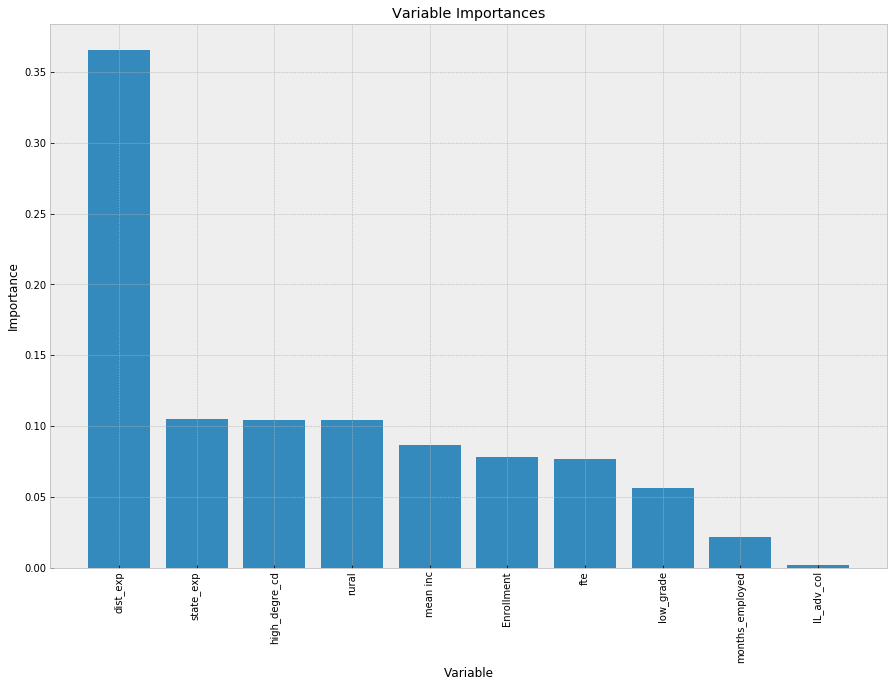

In [320]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance_2)))

# Make a bar chart 
plt.figure(figsize=(15,10))
plt.bar(x_values, importance_2, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_2, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Random Search Grid - rf_random3 (n_iter = 15, cv = 3) - Round 4

In [172]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]

In [173]:
max_features = [3,5,10]

In [174]:
max_depth = [int(x) for x in np.linspace(10,50, num = 5)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, None]

In [175]:
min_samples_split = [2,10,15,20]

In [176]:
min_samples_leaf = [1,10,50,100]

In [177]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [178]:
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': [3, 5, 10], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 10, 15, 20], 'min_samples_leaf': [1, 10, 50, 100], 'bootstrap': [True, False]}


In [179]:
rf_random3 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

In [213]:
rf_random3.fit(train_x, train_y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] n_estimators=110, min_samples_split=20, min_samples_leaf=50, max_features=5, max_depth=20, bootstrap=False 
[CV] n_estimators=110, min_samples_split=20, min_samples_leaf=50, max_features=5, max_depth=20, bootstrap=False 
[CV] n_estimators=110, min_samples_split=20, min_samples_leaf=50, max_features=5, max_depth=20, bootstrap=False 
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=50, max_features=10, max_depth=10, bootstrap=True 
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=50, max_features=10, max_depth=10, bootstrap=True 
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=50, max_features=10, max_depth=10, bootstrap=True 
[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=None, bootstrap=True 
[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=None, bootstrap=True 
[CV] n_estimators=110, min_samples

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=50, max_features=10, max_depth=10, bootstrap=True, total= 1.4min
[CV] n_estimators=70, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=50, max_features=10, max_depth=10, bootstrap=True, total= 1.6min
[CV] n_estimators=70, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=50, max_features=5, max_depth=10, bootstrap=False, total= 6.5min
[CV] n_estimators=70, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=50, max_features=5, max_depth=10, bootstrap=False, total= 6.5min
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=100, max_features=5, max_depth=50, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, mi

[Parallel(n_jobs=-1)]: Done  29 out of  45 | elapsed: 28.2min remaining: 15.6min


[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=30, bootstrap=False, total=11.4min
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=30, bootstrap=False, total=11.3min
[CV]  n_estimators=150, min_samples_split=15, min_samples_leaf=100, max_features=10, max_depth=None, bootstrap=True, total=27.8min
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=10, max_depth=30, bootstrap=False, total=11.4min
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=10, max_features=10, max_depth=20, bootstrap=True, total=12.2min
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=10, max_features=10, max_depth=20, bootstrap=True, total=11.5min
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=10, max_features=10, max_depth=20, bootstrap=True, total=11.9min
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=10, max_depth=10, bootstrap=True,

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 34.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': [3, 5, 10], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 10, 15, 20], 'min_samples_leaf': [1, 10, 50, 100], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

### Access the cross-validation results

In [214]:
cvres3 = rf_random3.grid_scores_

In [215]:
for i in range(0,15):
    print("RMSE = {}".format(np.sqrt(-(cvres3[i][1]))), 
          "Parameters = {}".format(cvres3[i][0]))

RMSE = 9110.379604111653 Parameters = {'n_estimators': 110, 'min_samples_split': 20, 'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 20, 'bootstrap': False}
RMSE = 10235.341719406597 Parameters = {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 50, 'max_features': 10, 'max_depth': 10, 'bootstrap': True}
RMSE = 9587.810146118081 Parameters = {'n_estimators': 110, 'min_samples_split': 10, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': None, 'bootstrap': True}
RMSE = 8465.13096165106 Parameters = {'n_estimators': 120, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': None, 'bootstrap': True}
RMSE = 9141.471496480495 Parameters = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 10, 'max_depth': None, 'bootstrap': False}
RMSE = 9493.95592113737 Parameters = {'n_estimators': 150, 'min_samples_split': 15, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': None, 'bootstrap': True}
RMSE =

Best Mean RMSE = 8465.13096165106

### Best combination of parameters of random search

In [216]:
rf_random3.best_params_

{'n_estimators': 120,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 5,
 'max_depth': None,
 'bootstrap': True}

In [246]:
rf_random3.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Performance on the testing
### Use the forest's predict method on the test data

In [217]:
predictions_3 = rf_random3.best_estimator_.predict(test_x)

In [218]:
mae_rand_3 = mean_absolute_error(test_y,predictions_3)
exVar_rand_3 = explained_variance_score(test_y,predictions_3)
mse_rand_3 = mean_squared_error(test_y,predictions_3)
rmse_rand_3 = np.sqrt(mse_rand_3)

In [321]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_rand_3))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_rand_3))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_rand_3))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(exVar_rand_3))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5625.453451432952
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 66131702.33054783
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 8132.140083062258
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8601799190013693


### Export the actual and prediction on the testing set for the best rf model

In [221]:
pred_y = predictions_3
pred_y

array([85517.99379664, 88195.30970473, 57692.53554963, ...,
       54479.1080808 , 49523.38055767, 71103.3596996 ])

In [224]:
pred_y = pd.DataFrame(pred_y)

In [225]:
test_result_3 = pd.concat([test_y, pred_y], axis=1)

In [227]:
test_result_3.rename(columns={0 : 'pred_y'}, inplace=True)
test_result_3.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [228]:
test_result_3.head(10)

,actual_y,pred_y
0,91345.060932,85517.993797
1,75652.106667,88195.309705
2,53400.540000,57692.535550
3,60649.723077,62636.880350
4,56093.878136,53813.906732
5,64073.573758,71697.062646
6,65040.439130,80261.108546
7,68709.372968,47191.180901
8,41750.979354,55031.282516
9,48750.995956,53582.847591


In [229]:
test_result_3.to_csv("RF_model_update.csv")

### Feature Importance

In [230]:
# extract the numerical values of feature importance from the random search
importances_3 = rf_random3.best_estimator_.feature_importances_

In [231]:
#create a list of tuples
feature_importance_3= sorted(zip(importances_3, feature_list), reverse=True)

In [232]:
#create two lists from the previous list of tuples
df_3 = pd.DataFrame(feature_importance_3, columns=['importance', 'feature'])
importance_3= list(df_3['importance'])
feature_3= list(df_3['feature'])

In [233]:
print(df_3)

   importance          feature
0    0.226590         dist_exp
1    0.219395        state_exp
2    0.110558    high_degre_cd
3    0.098456         mean inc
4    0.079921       Enrollment
5    0.076367              fte
6    0.072294            rural
7    0.057806        low_grade
8    0.034917  months_employed
9    0.023697       IL_adv_col


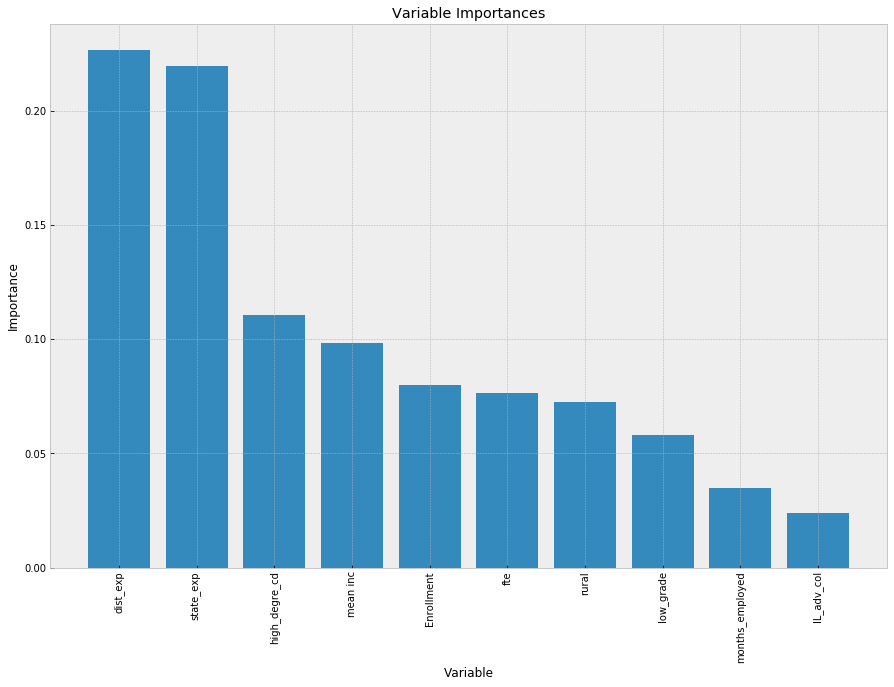

In [322]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance_3)))

# Make a bar chart 
plt.figure(figsize=(15,10))
plt.bar(x_values, importance_3, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_3, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Random Search Grid - rf_random4 (n_iter = 20, cv = 3) - Round 5

In [237]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 160, num = 12)]
n_estimators

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]

In [238]:
max_features = [5,8]

In [252]:
max_depth = [10,50]
max_depth.append(None)
max_depth

[10, 50, None]

In [253]:
min_samples_split = [2,10,20]

In [254]:
min_samples_leaf = [1,5,10]

In [255]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [256]:
print(random_grid)

{'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160], 'max_features': [5, 8], 'max_depth': [10, 50, None], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10], 'bootstrap': [True, False]}


In [257]:
rf_random4 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

In [258]:
rf_random4.fit(train_x, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_features=8, max_depth=None, bootstrap=True 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_features=8, max_depth=None, bootstrap=True 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_features=8, max_depth=None, bootstrap=True 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=1, max_features=8, max_depth=50, bootstrap=True 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=1, max_features=8, max_depth=50, bootstrap=True 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=1, max_features=8, max_depth=50, bootstrap=True 
[CV] n_estimators=60, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False 
[CV] n_estimators=60, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False 
[CV] n_estimators=60, min_samples_split=20,

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.1min


[CV]  n_estimators=60, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False, total= 6.0min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=10, max_features=8, max_depth=None, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False, total= 6.3min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=10, max_features=8, max_depth=None, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=None, bootstrap=False, total=19.3min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=10, max_features=8, max_depth=None, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=None, bootstrap=False, total=19.3min
[CV] n_estimators=70, min_samples_split=20, min_samples_leaf=1, max_features=5, max_depth=50, bootstrap=False 
[CV]  n_estimators=70, min_samples_spl

[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 48.6min remaining:  7.5min


[CV]  n_estimators=90, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=50, bootstrap=False, total=14.7min
[CV]  n_estimators=90, min_samples_split=20, min_samples_leaf=10, max_features=5, max_depth=50, bootstrap=False, total=14.4min
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False, total= 9.6min
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False, total= 9.5min
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=10, max_features=5, max_depth=10, bootstrap=False, total= 9.8min
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=5, max_features=8, max_depth=50, bootstrap=True, total= 6.4min
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=5, max_features=8, max_depth=50, bootstrap=True, total= 6.2min
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=5, max_features=8, max_depth=50, bootstrap=True, total= 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 51.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160], 'max_features': [5, 8], 'max_depth': [10, 50, None], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

### Access the cross-validation results

In [272]:
cvres4 = rf_random4.grid_scores_
cvres4

[mean: -70212389.45638, std: 1964910.13283, params: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': None, 'bootstrap': True},
 mean: -68840361.43400, std: 1874821.63936, params: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 50, 'bootstrap': True},
 mean: -100688936.27206, std: 4939286.67622, params: {'n_estimators': 60, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 10, 'bootstrap': False},
 mean: -70497943.31925, std: 1910988.27280, params: {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 50, 'bootstrap': False},
 mean: -73233969.23209, std: 2174896.93271, params: {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': None, 'bootstrap': False},
 mean: -71231999.69771, std: 1918214.15118, params: {'n_estimators': 70, 'min_samples_split': 10, 'min

### Extracting the Mean RMSE (3-fold) and its parameters setting

In [260]:
for i in range(0,20):
    print("RMSE = {}".format(np.sqrt(-(cvres4[i][1]))),
          ""
          "Parameters = {}".format(cvres4[i][0]))

RMSE = 8379.283349808447 Parameters = {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': None, 'bootstrap': True}
RMSE = 8297.009186086145 Parameters = {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}
RMSE = 10034.387687948727 Parameters = {'n_estimators': 60, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 10, 'bootstrap': False}
RMSE = 8396.305337423533 Parameters = {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 50, 'bootstrap': False}
RMSE = 8557.684805605148 Parameters = {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': None, 'bootstrap': False}
RMSE = 8439.905194829786 Parameters = {'n_estimators': 70, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 50, 'bootstrap': False}
RMSE = 8517.02

Best Mean RMSE = 8297.009186086145

### Check the best Parameters

In [264]:
rf_random4.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': 50,
 'bootstrap': True}

In [265]:
rf_random4.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Apply the best model to predict the testing set

In [261]:
predictions_4 = rf_random4.best_estimator_.predict(test_x)

In [262]:
mae_rand_4 = mean_absolute_error(test_y,predictions_4)
exVar_rand_4 = explained_variance_score(test_y,predictions_4)
mse_rand_4 = mean_squared_error(test_y,predictions_4)
rmse_rand_4 = np.sqrt(mse_rand_4)

In [297]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_rand_4))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_rand_4))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_rand_4))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(exVar_rand_4))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5428.6223685063005
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 63220575.41083231
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 7951.13673702272
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8663456373005975


### Export the actual and prediction on the testing set for the best rf model

In [296]:
predictions_4

array([85156.2500237 , 92022.93720033, 57810.69451812, ...,
       54513.98947925, 48153.30870279, 71728.09897971])

In [266]:
pred_y = predictions_4
pred_y

array([85156.2500237 , 92022.93720033, 57810.69451812, ...,
       54513.98947925, 48153.30870279, 71728.09897971])

In [267]:
pred_y = pd.DataFrame(pred_y)

In [268]:
test_result_4 = pd.concat([test_y, pred_y], axis=1)

In [269]:
test_result_4.rename(columns={0 : 'pred_y'}, inplace=True)
test_result_4.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [270]:
test_result_4.head(10)

,actual_y,pred_y
0,91345.060932,85156.250024
1,75652.106667,92022.937200
2,53400.540000,57810.694518
3,60649.723077,63315.124955
4,56093.878136,54495.130484
5,64073.573758,71752.562180
6,65040.439130,78250.327880
7,68709.372968,47116.161026
8,41750.979354,53872.350021
9,48750.995956,52103.955715


In [271]:
test_result_4.to_csv("RF_model_update_2.csv")

### Use the extracted hyper-parameter setting to fit the optimal RF model - rf_best

In [302]:
rf_random4.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
rf_best = RandomForestRegressor(random_state = 42,
                                n_jobs = -1,
                                n_estimators = 150,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 8,
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)

In [36]:
rf_best.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
rf_best.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [38]:
pred = rf_best.predict(test_x)

In [39]:
mae = mean_absolute_error(test_y, pred)
ex_var = explained_variance_score(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = np.sqrt(mse)

In [40]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(ex_var))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5429.878618037029
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 63253069.84024411
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 7953.17985715425
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8662782372870054


### Cross validation with three-fold on the training set

In [27]:
model=[]
modelRMSE=[]
modelExplVar=[]

scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
scores = cross_validate(rf_best, train_x, train_y, scoring=scorers, cv=3)
scores_RMSE = np.asarray([np.sqrt(-x) for x in scores['test_Neg_MSE']])
print(" RMSE: %0.2f (+/- %0.2f)" % (scores_RMSE.mean(), scores_RMSE.std() * 2))        
scores_Expl_Var = scores['test_expl_var']
print(" Expl_Var: %0.2f (+/- %0.2f)" % (scores_Expl_Var.mean(), scores_Expl_Var.std() * 2))                           

/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


 RMSE: 8298.99 (+/- 226.02)
 Expl_Var: 0.85 (+/- 0.01)


In [61]:
# extract the numerical values of feature importance from the random search
importances_best = rf_best.feature_importances_

# feature list
feature_list = list(train_x.columns)

#create a list of tuples
feature_best = sorted(zip(importances_best, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_best = pd.DataFrame(feature_best, columns=['importance', 'feature'])
importance_best= list(df_best['importance'])
feature_best= list(df_best['feature'])

In [62]:
print(df_best)

   importance          feature
0    0.301964         dist_exp
1    0.155032        state_exp
2    0.099851    high_degre_cd
3    0.098048         mean inc
4    0.092648            rural
5    0.087461       Enrollment
6    0.074819              fte
7    0.058123        low_grade
8    0.025184  months_employed
9    0.006870       IL_adv_col


In [63]:
df_best.to_csv("rf_featureImportant.csv")

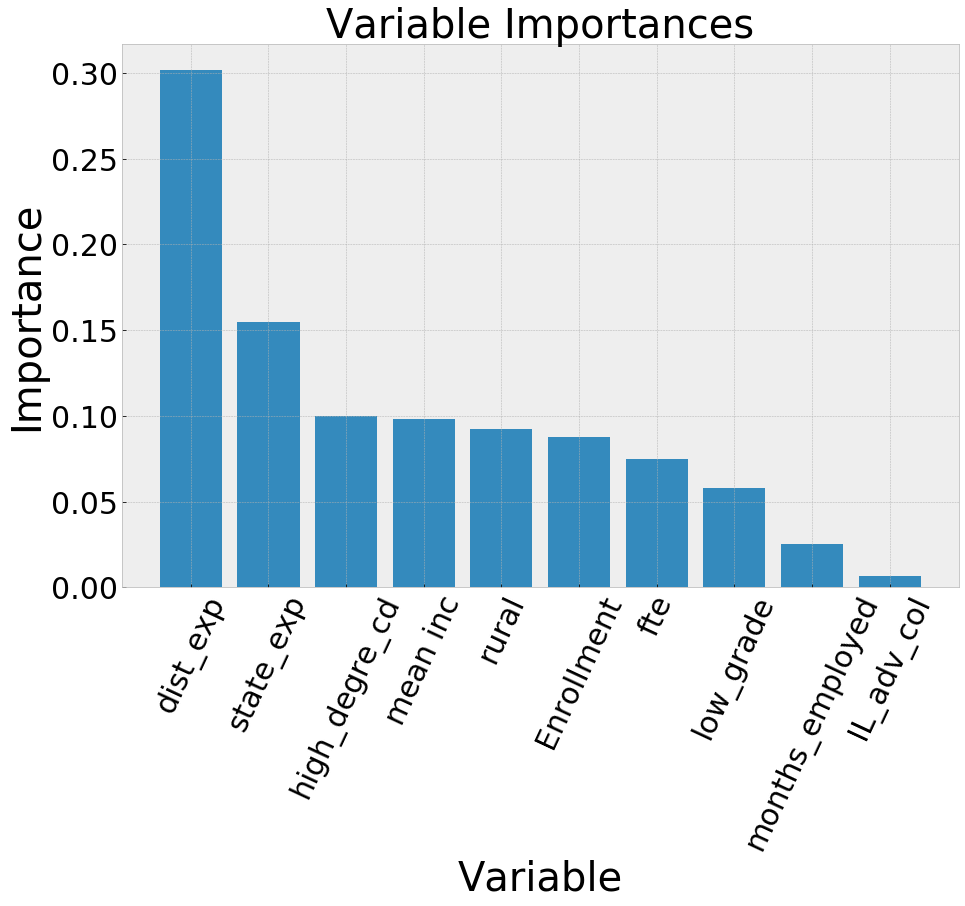

In [29]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_best)))

# Make a bar chart 
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.bar(x_values, importance_best, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_best, rotation=65)
# Axis labels and title
plt.ylabel('Importance',fontsize = 40); plt.xlabel('Variable',fontsize = 40); 
plt.title('Variable Importances',fontsize = 40);

In [48]:
print(rf_best.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)>


In [264]:
importances = list(rf_best.feature_importances_)

In [265]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [266]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [267]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: dist_exp             Importance: 0.3
Variable: state_exp            Importance: 0.16
Variable: high_degre_cd        Importance: 0.1
Variable: mean inc             Importance: 0.1
Variable: Enrollment           Importance: 0.09
Variable: rural                Importance: 0.09
Variable: fte                  Importance: 0.07
Variable: low_grade            Importance: 0.06
Variable: months_employed      Importance: 0.03
Variable: IL_adv_col           Importance: 0.01


[None, None, None, None, None, None, None, None, None, None]

In [268]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

In [269]:
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

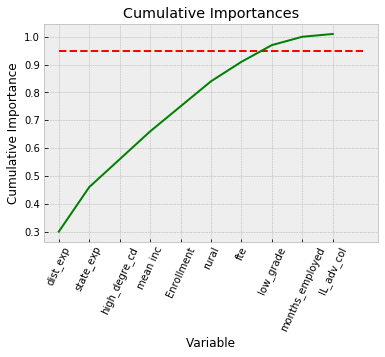

In [272]:
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 65)

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [273]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 8


### rf_best Prediction interval

In [26]:
test_npx = np.array(test_x)

In [27]:
test_npx.shape

(261011, 10)

In [54]:
test_npy = np.array(test_y)

In [40]:
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(np.array(X.iloc[x]).reshape(1,-1))[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [41]:
err_down, err_up = pred_ints(rf_best, test_x, percentile=90)

In [51]:
len(err_down), len(err_up)

(261011, 261011)

In [127]:
diff = []
for i in range(len(err_down)):
    diff.append(err_up[i] - err_down[i])
print(mean(diff))

14385.611809227656


In [125]:
from statistics import mean 

In [59]:
truth = test_npy
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print (correct/len(truth))

0.6578458379148772


65% of the test fall into the prediction interval

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
err_mean = rf_best.predict(test_x)

In [111]:
df = pd.DataFrame()
df['v']=truth
df['p_d']=err_down
df['p_u']=err_up
df['p']=err_mean

In [113]:
df = pd.DataFrame(test_y)

In [114]:
df['p_d']=err_down
df['p_u']=err_up
df['p']=err_mean

In [121]:
df.to_csv("prediction_interval.csv")

<ErrorbarContainer object of 3 artists>

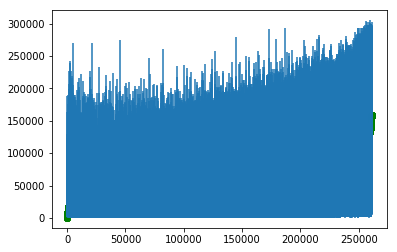

In [119]:
#Plot DF
a=df.sort_values(['inf_adj_salary']).reset_index()
plt.scatter(a.index,a['inf_adj_salary'],color='green')
plt.errorbar(a.index,a['p'],yerr=[a['p_d'],a['p_u']])

The prediction interval graph was created using Tableau

### Multicollinearity

In [166]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
#gather features
features = "+".join(train_x.columns)

In [177]:
train_x.rename(columns={'mean inc':'mean_inc'}, inplace=True)

In [183]:
train_feature.rename(columns={'mean inc':'mean_inc'}, inplace=True)

In [185]:
# get y and X dataframes based on this regression:
y, X = dmatrices('inf_adj_salary ~' + features, train_feature, return_type='dataframe')

In [186]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [187]:
vif.round(1)

,VIF Factor,features
0,428.6,Intercept
1,1.5,months_employed
2,1.2,fte
3,7.6,dist_exp
4,7.6,state_exp
5,3.4,high_degre_cd
6,3.4,IL_adv_col
7,1.0,low_grade
8,4.0,mean_inc
9,3.7,Enrollment


### Drop 'state_exp'

In [139]:
train_x.columns

Index(['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd',
       'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural'],
      dtype='object')

In [143]:
train_x_1 = train_x.drop(columns=['state_exp'])

In [146]:
train_x_1.columns

Index(['months_employed', 'fte', 'dist_exp', 'high_degre_cd', 'IL_adv_col',
       'low_grade', 'mean inc', 'Enrollment', 'rural'],
      dtype='object')

In [149]:
test_x_1 = test_x.drop(columns = ['state_exp'])

In [150]:
test_x_1.columns

Index(['months_employed', 'fte', 'dist_exp', 'high_degre_cd', 'IL_adv_col',
       'low_grade', 'mean inc', 'Enrollment', 'rural'],
      dtype='object')

In [147]:
rf_1 = RandomForestRegressor(random_state = 42,
                                n_jobs = -1,
                                n_estimators = 150,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 8,
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)

In [148]:
rf_1.fit(train_x_1, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [152]:
pred_1 = rf_1.predict(test_x_1)

In [163]:
mae_1 = mean_absolute_error(test_y, pred_1)
ex_var_1 = explained_variance_score(test_y, pred_1)
mse_1 = mean_squared_error(test_y, pred_1)
rmse_1 = np.sqrt(mse_1)

In [164]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_1))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_1))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_1))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(ex_var_1))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 6088.691734079064
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 76668165.31086616
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 8756.035935905365
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8379151904442352


### Drop 'dist_exp'

In [188]:
train_x_2 = train_x.drop(columns=['dist_exp'])

In [189]:
train_x_2.columns

Index(['months_employed', 'fte', 'state_exp', 'high_degre_cd', 'IL_adv_col',
       'low_grade', 'mean_inc', 'Enrollment', 'rural'],
      dtype='object')

In [191]:
test_x_2 = test_x.drop(columns = ['dist_exp'])

In [192]:
test_x_2.columns

Index(['months_employed', 'fte', 'state_exp', 'high_degre_cd', 'IL_adv_col',
       'low_grade', 'mean inc', 'Enrollment', 'rural'],
      dtype='object')

In [194]:
rf_2 = RandomForestRegressor(random_state = 42,
                                n_jobs = -1,
                                n_estimators = 150,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 8,
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)

In [195]:
rf_2.fit(train_x_2, train_y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [200]:
pred_2 = rf_2.predict(test_x_2)

In [202]:
mae_2 = mean_absolute_error(test_y, pred_2)
ex_var_2 = explained_variance_score(test_y, pred_2)
mse_2 = mean_squared_error(test_y, pred_2)
rmse_2 = np.sqrt(mse_2)

In [203]:
print("Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is {}".format(mae_2))
print("Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is {}".format(mse_2))
print("Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is {}".format(rmse_2))
print("Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is {}".format(ex_var_2))

Using the Best Random forest model from RandomSearchCV, The Mean Absolute Error on the testing set is 5523.495303785753
Using the Best Random forest model from RandomSearchCV, The Mean Squared Error on the testing set is 66382907.008144334
Using the Best Random forest model from RandomSearchCV, The Rooted Mean Squared Error on the testing set is 8147.570620015781
Using the Best Random forest model from RandomSearchCV, The explained variance score on the testing set is 0.8596594369219667


### Random Search Grid - rf_random5 (n_iter = 30, cv = 3) - Round 6

In [293]:
n_estimators = [int(x) for x in np.linspace(start = 110, stop = 160, num = 6)]
n_estimators

[110, 120, 130, 140, 150, 160]

In [294]:
max_features = [5]

In [295]:
max_depth = [50]
max_depth.append(None)
max_depth

[50, None]

In [296]:
min_samples_split = [2,5]

In [297]:
min_samples_leaf = [1,2]

In [298]:
bootstrap = [True, False]

In [299]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [300]:
print(random_grid)

{'n_estimators': [110, 120, 130, 140, 150, 160], 'max_features': [5], 'max_depth': [50, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [301]:
6*1*2*2*2*2*3

288

### Test on the minority group - assess if it is fair

In [140]:
rf_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

### Female

In [142]:
female = pd.read_csv("FemaleTest.csv",sep = ",", na_values = ["?"])

In [143]:
female.shape

(1004167, 47)

In [144]:
female_feature = female[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]

In [145]:
female_x = female_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]

In [146]:
female_y = female_feature[['inf_adj_salary']]

In [149]:
female_y.head(10)

,inf_adj_salary
0,75652.106667
1,53400.540000
2,60649.723077
3,56093.878136
4,64073.573758
5,68709.372968
6,41750.979354
7,48750.995956
8,49805.034722
9,47520.474217


In [150]:
pred_female = rf_best.predict(female_x)

In [155]:
pred_female[0:10]

array([92798.23907385, 57532.62259523, 63232.88594795, 55151.21894006,
       72148.07107307, 47163.27402182, 53758.42850164, 52205.24997039,
       52385.67943209, 42865.87110675])

### Export the actual and prediction on female for the best rf model

In [151]:
pred_y = pd.DataFrame(pred_female)

In [157]:
female_rf = pd.concat([female_y, pred_y], axis=1)

In [158]:
female_rf.rename(columns={0 : 'pred_y'}, inplace=True)
female_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [159]:
female_rf.head(10)

,actual_y,pred_y
0,75652.106667,92798.239074
1,53400.540000,57532.622595
2,60649.723077,63232.885948
3,56093.878136,55151.218940
4,64073.573758,72148.071073
5,68709.372968,47163.274022
6,41750.979354,53758.428502
7,48750.995956,52205.249970
8,49805.034722,52385.679432
9,47520.474217,42865.871107


In [161]:
female_rf.shape

(1004167, 2)

In [162]:
female_rf.to_csv("female_rf.csv")

### African American

In [167]:
African_american = pd.read_csv("AfricanAmericanTest.csv",sep = ",", na_values = ["?"])
African_american.shape

(110600, 47)

In [168]:
AfriAmerican_feature = African_american[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
AfriAmerican_x = AfriAmerican_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
AfriAmerican_y = AfriAmerican_feature[['inf_adj_salary']]

In [169]:
AfriAmerican_x.shape

(110600, 10)

In [170]:
AfriAmerican_y.shape

(110600, 1)

In [171]:
AfriAmerican_y.head(10)

,inf_adj_salary
0,81124.989986
1,84492.595820
2,77436.574049
3,97395.936089
4,66814.183420
5,39708.200000
6,47309.601100
7,41545.072222
8,77745.140734
9,73050.512880


In [174]:
pred_Afri = rf_best.predict(AfriAmerican_x)
pred_Afri[0:10]

array([75417.06354006, 86870.07710312, 76781.69922826, 88326.88586056,
       63445.49455413, 52037.75804114, 51206.01212951, 35876.25032107,
       73983.86763432, 71948.94788806])

### Export the actual and prediction on African_American for the best rf model

In [175]:
pred_y_af = pd.DataFrame(pred_Afri)

In [176]:
pred_y_af.head(10)

,0
0,75417.063540
1,86870.077103
2,76781.699228
3,88326.885861
4,63445.494554
5,52037.758041
6,51206.012130
7,35876.250321
8,73983.867634
9,71948.947888


In [177]:
afri_rf = pd.concat([AfriAmerican_y, pred_y_af], axis=1)

In [178]:
afri_rf.rename(columns={0 : 'pred_y'}, inplace=True)
afri_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [179]:
afri_rf.shape

(110600, 2)

In [181]:
afri_rf.head(10)

,actual_y,pred_y
0,81124.989986,75417.063540
1,84492.595820,86870.077103
2,77436.574049,76781.699228
3,97395.936089,88326.885861
4,66814.183420,63445.494554
5,39708.200000,52037.758041
6,47309.601100,51206.012130
7,41545.072222,35876.250321
8,77745.140734,73983.867634
9,73050.512880,71948.947888


In [182]:
afri_rf.to_csv("afri_rf.csv")

### Asian American

In [183]:
Asian_american = pd.read_csv("AsianTest.csv",sep = ",", na_values = ["?"])
Asian_american.shape

(15912, 47)

In [184]:
AsianAmerican_feature = Asian_american[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
AsianAmerican_x = AsianAmerican_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
AsianAmerican_y = AsianAmerican_feature[['inf_adj_salary']]

In [186]:
AsianAmerican_x.shape

(15912, 10)

In [187]:
AsianAmerican_y.shape

(15912, 1)

In [188]:
AsianAmerican_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,4,20,1.0,1.0,4,0,7,266951.219512,829903,0
1,8,36,5.0,6.0,4,0,-1,29314.528796,31340,0
2,10,100,4.0,4.0,4,0,6,36093.600256,54549,0
3,9,66,2.0,2.0,5,0,6,69495.151561,18974,0
4,9,67,1.0,1.0,4,0,-1,266951.219512,829903,0
5,9,100,4.0,4.0,4,0,-3,65634.420086,12872,0
6,10,20,9.0,10.0,4,0,-1,268580.232193,10320,0
7,10,40,4.0,4.0,4,0,-1,53935.334294,12586,0
8,10,60,3.0,10.0,5,0,4,482950.194553,4148,0
9,10,60,2.0,9.0,5,0,4,790705.287714,4003,0


In [189]:
AsianAmerican_y.head(10)

,inf_adj_salary
0,14106.351254
1,17212.280000
2,49236.296389
3,42201.690391
4,41618.379928
5,45869.912261
6,12073.437916
7,16971.122837
8,34104.078031
9,33027.843705


In [190]:
pred_Asian = rf_best.predict(AsianAmerican_x)
pred_Asian[0:10]

array([13093.39536659, 18342.12405534, 45320.00494687, 38387.33381124,
       42328.25167041, 46015.51332271, 15358.75500687, 16604.63233472,
       34859.08380633, 35404.25887153])

### Export the actual and prediction on Asian_American for the best rf model

In [192]:
pred_y_as = pd.DataFrame(pred_Asian)

In [193]:
pred_y_as.head(10)

,0
0,13093.395367
1,18342.124055
2,45320.004947
3,38387.333811
4,42328.251670
5,46015.513323
6,15358.755007
7,16604.632335
8,34859.083806
9,35404.258872


In [199]:
asian_rf = pd.concat([AsianAmerican_y, pred_y_as], axis=1)
asian_rf.head(10)

,inf_adj_salary,0
0,14106.351254,13093.395367
1,17212.280000,18342.124055
2,49236.296389,45320.004947
3,42201.690391,38387.333811
4,41618.379928,42328.251670
5,45869.912261,46015.513323
6,12073.437916,15358.755007
7,16971.122837,16604.632335
8,34104.078031,34859.083806
9,33027.843705,35404.258872


In [196]:
asian_rf.rename(columns={0 : 'pred_y'}, inplace=True)
asian_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [197]:
asian_rf.shape

(15912, 2)

In [198]:
asian_rf.head(10)

,actual_y,pred_y
0,14106.351254,13093.395367
1,17212.280000,18342.124055
2,49236.296389,45320.004947
3,42201.690391,38387.333811
4,41618.379928,42328.251670
5,45869.912261,46015.513323
6,12073.437916,15358.755007
7,16971.122837,16604.632335
8,34104.078031,34859.083806
9,33027.843705,35404.258872


In [200]:
asian_rf.to_csv("asian_rf.csv")

### Native American

In [201]:
Native_american = pd.read_csv("NativeAmericanTest.csv",sep = ",", na_values = ["?"])
Native_american.shape

(2207, 47)

In [202]:
Native_feature = Native_american[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
Native_x = Native_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
Native_y = Native_feature[['inf_adj_salary']]

In [203]:
Native_x.shape

(2207, 10)

In [204]:
Native_y.shape

(2207, 1)

In [205]:
Native_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,9,100,32.0,32.0,5,1,4,182664.855049,855562,0
1,7,70,4.0,4.0,4,0,-1,197917.602996,847484,0
2,10,100,2.0,2.0,5,1,-1,368551.263001,813065,0
3,10,100,21.0,21.0,5,1,-3,327223.717949,798856,0
4,10,100,27.0,27.0,4,0,9,266951.219512,829903,0
5,9,100,7.0,7.0,4,0,-3,182664.855049,855562,0
6,10,100,5.0,5.0,5,1,-3,378136.792453,793012,0
7,10,100,5.0,5.0,4,0,-3,353775.657895,813905,0
8,10,100,5.0,10.0,5,1,-3,53885.308478,31412,0
9,9,100,4.0,4.0,5,1,9,76801.560989,74256,0


In [206]:
Native_y.head(10)

,inf_adj_salary
0,96626.810609
1,54221.966501
2,59109.472222
3,90377.000000
4,76037.218638
5,59880.391261
6,65899.685673
7,58120.376690
8,63161.843889
9,57579.861841


In [207]:
pred_Native = rf_best.predict(Native_x)
pred_Native[0:10]

array([88094.97534287, 53655.33842306, 56791.21945422, 90581.18683386,
       82827.92190984, 63147.21291753, 64503.38792061, 57808.27985524,
       64263.4335038 , 66844.81630304])

### Export the actual and prediction on Native_American for the best rf model

In [208]:
pred_y_na = pd.DataFrame(pred_Native)

In [209]:
pred_y_na.head(10)

,0
0,88094.975343
1,53655.338423
2,56791.219454
3,90581.186834
4,82827.921910
5,63147.212918
6,64503.387921
7,57808.279855
8,64263.433504
9,66844.816303


In [210]:
native_rf = pd.concat([Native_y, pred_y_na], axis=1)
native_rf.head(10)

,inf_adj_salary,0
0,96626.810609,88094.975343
1,54221.966501,53655.338423
2,59109.472222,56791.219454
3,90377.000000,90581.186834
4,76037.218638,82827.921910
5,59880.391261,63147.212918
6,65899.685673,64503.387921
7,58120.376690,57808.279855
8,63161.843889,64263.433504
9,57579.861841,66844.816303


In [211]:
native_rf.rename(columns={0 : 'pred_y'}, inplace=True)
native_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [212]:
native_rf.shape

(2207, 2)

In [213]:
native_rf.head(10)

,actual_y,pred_y
0,96626.810609,88094.975343
1,54221.966501,53655.338423
2,59109.472222,56791.219454
3,90377.000000,90581.186834
4,76037.218638,82827.921910
5,59880.391261,63147.212918
6,65899.685673,64503.387921
7,58120.376690,57808.279855
8,63161.843889,64263.433504
9,57579.861841,66844.816303


In [214]:
native_rf.to_csv("native_rf.csv")

### Hispanic American

In [215]:
Hispanic = pd.read_csv("HispanicTest.csv",sep = ",", na_values = ["?"])
Hispanic.shape

(60823, 47)

In [216]:
Hispanic_feature = Hispanic[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
Hispanic_x = Hispanic_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
Hispanic_y = Hispanic_feature[['inf_adj_salary']]

In [217]:
Hispanic_x.shape

(60823, 10)

In [218]:
Hispanic_y.shape

(60823, 1)

In [219]:
Hispanic_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,10,100,5.0,5.0,5,1,9,71616.066413,19494,0
1,9,100,13.0,13.0,5,1,-3,41793.339818,88020,0
2,10,100,22.0,22.0,5,1,-1,327223.717949,798856,0
3,10,100,18.0,18.0,4,0,-1,335298.271976,780084,0
4,10,100,7.0,8.0,5,1,7,97013.678652,53489,0
5,4,40,6.0,6.0,5,1,-1,197917.602996,847484,0
6,10,100,13.0,13.0,4,0,10,281196.380697,802889,0
7,10,100,8.0,8.0,4,0,-3,353775.657895,813905,0
8,10,100,1.0,1.0,4,0,4,182664.855049,855562,0
9,10,100,5.0,5.0,4,0,-3,28754.070023,41481,0


In [220]:
Hispanic_y.head(10)

,inf_adj_salary
0,65820.772123
1,72679.105556
2,90354.000000
3,89311.520669
4,77668.413190
5,43152.657575
6,79022.623388
7,65666.670396
8,46114.598478
9,59341.156937


In [221]:
pred_his = rf_best.predict(Hispanic_x)
pred_his[0:10]

array([75107.9107772 , 77041.60341309, 91425.38238926, 87807.94295472,
       76865.49483147, 40641.46640882, 77472.87217844, 64469.71362212,
       50740.06543597, 56956.69977094])

### Export the actual and prediction on Hispanic_American for the best rf model

In [222]:
pred_y_his = pd.DataFrame(pred_his)

In [223]:
pred_y_his.head(10)

,0
0,75107.910777
1,77041.603413
2,91425.382389
3,87807.942955
4,76865.494831
5,40641.466409
6,77472.872178
7,64469.713622
8,50740.065436
9,56956.699771


In [224]:
hispanic_rf = pd.concat([Hispanic_y, pred_y_his], axis=1)
hispanic_rf.head(10)

,inf_adj_salary,0
0,65820.772123,75107.910777
1,72679.105556,77041.603413
2,90354.000000,91425.382389
3,89311.520669,87807.942955
4,77668.413190,76865.494831
5,43152.657575,40641.466409
6,79022.623388,77472.872178
7,65666.670396,64469.713622
8,46114.598478,50740.065436
9,59341.156937,56956.699771


In [42]:
hispanic_rf.rename(columns={0 : 'pred_y'}, inplace=True)
hispanic_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [226]:
hispanic_rf.shape

(60823, 2)

In [227]:
hispanic_rf.head(10)

,actual_y,pred_y
0,65820.772123,75107.910777
1,72679.105556,77041.603413
2,90354.000000,91425.382389
3,89311.520669,87807.942955
4,77668.413190,76865.494831
5,43152.657575,40641.466409
6,79022.623388,77472.872178
7,65666.670396,64469.713622
8,46114.598478,50740.065436
9,59341.156937,56956.699771


In [228]:
hispanic_rf.to_csv("hispanic_rf.csv")

### Male actual versus prediction

In [30]:
male = pd.read_csv("MenTest.csv",sep = ",", na_values = ["?"])

In [31]:
male.shape

(210106, 47)

In [32]:
male_feature = male[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
male_x = male_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
male_y = male_feature[['inf_adj_salary']]

In [33]:
male_x.shape

(210106, 10)

In [34]:
male_y.shape

(210106, 1)

In [40]:
male_y.head(10)

,inf_adj_salary
0,49507.436194
1,69831.063333
2,43819.700000
3,56706.000000
4,87848.288128
5,63923.634783
6,62149.348252
7,44302.817391
8,127387.282160
9,76152.210000


In [35]:
male_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,8,89,3.0,3.0,5,1,6,46038.116886,35542,0
1,10,100,4.0,6.0,5,1,9,288152.714416,33354,0
2,10,100,2.0,3.0,4,0,-1,111358.370370,53734,0
3,10,100,1.0,1.0,5,1,-3,327223.717949,798856,0
4,10,100,24.0,24.0,5,1,9,281196.380697,802889,0
5,9,100,6.0,7.0,4,0,7,41686.009972,34261,1
6,10,100,24.0,24.0,5,1,-3,353775.657895,813905,0
7,10,100,1.0,4.0,4,0,-1,107464.247965,2528,0
8,10,100,17.0,17.0,5,0,9,92431.830581,26320,0
9,9,100,14.0,14.0,4,0,9,42770.841487,5442,1


In [36]:
pred_male = rf_best.predict(male_x)
pred_male[0:10]

array([ 52080.75236464,  70352.42528903,  45314.45911836,  50756.04093303,
        87033.41952925,  54722.95114202,  87374.60994955,  45106.9540611 ,
       122878.41117844,  66955.89453177])

### Export the actual and prediction on male for the best rf model

In [37]:
pred_y_male = pd.DataFrame(pred_male)

In [38]:
pred_y_male.head(10)

,0
0,52080.752365
1,70352.425289
2,45314.459118
3,50756.040933
4,87033.419529
5,54722.951142
6,87374.609950
7,45106.954061
8,122878.411178
9,66955.894532


In [39]:
male_rf = pd.concat([male_y, pred_y_male], axis=1)
male_rf.head(10)

,inf_adj_salary,0
0,49507.436194,52080.752365
1,69831.063333,70352.425289
2,43819.700000,45314.459118
3,56706.000000,50756.040933
4,87848.288128,87033.419529
5,63923.634783,54722.951142
6,62149.348252,87374.609950
7,44302.817391,45106.954061
8,127387.282160,122878.411178
9,76152.210000,66955.894532


In [43]:
male_rf.rename(columns={0 : 'pred_y'}, inplace=True)
male_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [44]:
male_rf.head(10)

,actual_y,pred_y
0,49507.436194,52080.752365
1,69831.063333,70352.425289
2,43819.700000,45314.459118
3,56706.000000,50756.040933
4,87848.288128,87033.419529
5,63923.634783,54722.951142
6,62149.348252,87374.609950
7,44302.817391,45106.954061
8,127387.282160,122878.411178
9,76152.210000,66955.894532


In [45]:
male_rf.to_csv("male_rf.csv")

### Visualize one tree from the RF

In [82]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [88]:
rf_best.estimators_[-1]

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=907706759, splitter='best')

In [89]:
tree = rf_best.estimators_[-1]

In [85]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [86]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

KeyboardInterrupt: 

In [ ]:
# Write graph to a png file
graph.write_png('tree.png');

In [87]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

KeyboardInterrupt: 

#### All the trees in the optimal RandomForest regressor

In [303]:
# Total number of trees should be 150
len(rf_best.estimators_)

150

It took too long to visualize one tree due to the relatively large depth of 50 and number of nodes.

### White actual vs. prediciton

In [64]:
white = pd.read_csv("WhiteTest.csv",sep = ",", na_values = ["?"])

In [65]:
white.shape

(1108148, 11)

In [66]:
white_feature = white[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
white_x = white_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
white_y = white_feature[['inf_adj_salary']]

In [67]:
white_x.shape

(1108148, 10)

In [68]:
white_y.shape

(1108148, 1)

In [69]:
white_y.head(10)

,inf_adj_salary
0,35057.951398
1,11217.786483
2,25541.586995
3,26061.960000
4,22283.509557
5,4377.880000
6,18129.605866
7,42879.605429
8,33674.666667
9,32732.600000


In [70]:
white_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,3,33,1.0,1.0,1,0,-3,72324.068089,4486,1
1,3,33,0.1,0.1,1,0,-1,56602.576246,8944,0
2,5,50,0.5,0.5,1,0,9,48822.739934,10040,0
3,8,89,1.0,1.0,1,0,-3,61123.782235,8656,1
4,8,27,1.0,1.0,1,0,11,45932.726465,848,0
5,9,12,1.0,1.0,1,0,-3,53211.019737,12226,1
6,9,100,0.0,0.0,1,0,-3,43572.230872,33550,1
7,9,100,1.0,1.0,1,0,-3,47858.255696,21792,0
8,9,100,1.0,1.0,1,0,-3,41152.353506,3440,1
9,9,100,1.0,1.0,1,0,-3,46990.243902,1118,1


In [71]:
pred_white = rf_best.predict(white_x)
pred_white[0:10]

array([21507.49885497, 18320.6691285 , 34215.985193  , 34816.01740992,
       19104.19120571,  5512.51743394, 28358.82560906, 41112.4097153 ,
       35877.83533757, 34802.11717266])

### Extract the actual vs prediction for white

In [72]:
pred_y_white = pd.DataFrame(pred_white)

In [73]:
pred_y_white.head(10)

,0
0,21507.498855
1,18320.669129
2,34215.985193
3,34816.017410
4,19104.191206
5,5512.517434
6,28358.825609
7,41112.409715
8,35877.835338
9,34802.117173


In [74]:
white_rf = pd.concat([white_y, pred_y_white], axis=1)
white_rf.head(10)

,inf_adj_salary,0
0,35057.951398,21507.498855
1,11217.786483,18320.669129
2,25541.586995,34215.985193
3,26061.960000,34816.017410
4,22283.509557,19104.191206
5,4377.880000,5512.517434
6,18129.605866,28358.825609
7,42879.605429,41112.409715
8,33674.666667,35877.835338
9,32732.600000,34802.117173


In [75]:
white_rf.rename(columns={0 : 'pred_y'}, inplace=True)
white_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [77]:
white_rf.head(10)

,actual_y,pred_y
0,35057.951398,21507.498855
1,11217.786483,18320.669129
2,25541.586995,34215.985193
3,26061.960000,34816.017410
4,22283.509557,19104.191206
5,4377.880000,5512.517434
6,18129.605866,28358.825609
7,42879.605429,41112.409715
8,33674.666667,35877.835338
9,32732.600000,34802.117173


In [78]:
white_rf.to_csv("white_rf.csv")

### White men actual vs. prediciton

In [90]:
whiteMen = pd.read_csv("WhiteMenTest.csv",sep = ",", na_values = ["?"])

In [91]:
whiteMen.shape

(258873, 11)

In [97]:
whiteMen.head(10)

,inf_adj_salary,rural,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment
0,64990.377946,0,9,100,13.0,13.0,5,1,-1,39482.797140,5196
1,89062.419000,0,9,100,9.0,12.0,5,1,-1,117835.568602,52920
2,54139.311545,1,9,100,3.0,16.0,4,0,4,47413.017751,2730
3,102198.625024,1,10,100,16.0,16.0,6,0,9,53627.985641,41135
4,76387.759441,0,9,100,6.0,6.0,5,0,9,127204.173338,20195
5,71214.988101,0,9,100,10.0,10.0,5,0,9,25668.349939,99628
6,100203.517290,0,12,100,35.0,35.0,5,1,-1,197917.602996,847484
7,84803.508696,0,10,100,30.0,31.0,5,1,9,31338.888964,55053
8,86126.160293,1,9,100,33.0,33.0,4,0,9,64047.166317,72770
9,61289.852222,1,9,100,4.0,11.0,5,1,9,36825.166601,4102


In [92]:
whiteMen_feature = whiteMen[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural','inf_adj_salary']]
whiteMen_x = whiteMen_feature[['months_employed', 'fte', 'dist_exp', 'state_exp', 'high_degre_cd', 'IL_adv_col', 'low_grade', 'mean inc', 'Enrollment', 'rural']]
whiteMen_y = whiteMen_feature[['inf_adj_salary']]

In [93]:
whiteMen_x.shape

(258873, 10)

In [94]:
whiteMen_y.shape

(258873, 1)

In [95]:
whiteMen_y.head(10)

,inf_adj_salary
0,64990.377946
1,89062.419000
2,54139.311545
3,102198.625024
4,76387.759441
5,71214.988101
6,100203.517290
7,84803.508696
8,86126.160293
9,61289.852222


In [96]:
whiteMen_x.head(10)

,months_employed,fte,dist_exp,state_exp,high_degre_cd,IL_adv_col,low_grade,mean inc,Enrollment,rural
0,9,100,13.0,13.0,5,1,-1,39482.797140,5196,0
1,9,100,9.0,12.0,5,1,-1,117835.568602,52920,0
2,9,100,3.0,16.0,4,0,4,47413.017751,2730,1
3,10,100,16.0,16.0,6,0,9,53627.985641,41135,1
4,9,100,6.0,6.0,5,0,9,127204.173338,20195,0
5,9,100,10.0,10.0,5,0,9,25668.349939,99628,0
6,12,100,35.0,35.0,5,1,-1,197917.602996,847484,0
7,10,100,30.0,31.0,5,1,9,31338.888964,55053,0
8,9,100,33.0,33.0,4,0,9,64047.166317,72770,1
9,9,100,4.0,11.0,5,1,9,36825.166601,4102,1


In [98]:
pred_whiteMen = rf_best.predict(whiteMen_x)
pred_whiteMen[0:10]

array([ 61739.71454236,  84309.52030924,  51089.2280035 , 100203.82644238,
        64142.97719502,  73480.7054244 , 113025.5479279 ,  76087.37405084,
        81122.71599578,  52611.72438332])

### Extract the actual vs prediction for white Men

In [100]:
pred_y_whiteMen = pd.DataFrame(pred_whiteMen)

In [101]:
pred_y_whiteMen.head(10)

,0
0,61739.714542
1,84309.520309
2,51089.228003
3,100203.826442
4,64142.977195
5,73480.705424
6,113025.547928
7,76087.374051
8,81122.715996
9,52611.724383


In [102]:
whiteMen_rf = pd.concat([whiteMen_y, pred_y_whiteMen], axis=1)
whiteMen_rf.head(10)

,inf_adj_salary,0
0,64990.377946,61739.714542
1,89062.419000,84309.520309
2,54139.311545,51089.228003
3,102198.625024,100203.826442
4,76387.759441,64142.977195
5,71214.988101,73480.705424
6,100203.517290,113025.547928
7,84803.508696,76087.374051
8,86126.160293,81122.715996
9,61289.852222,52611.724383


In [103]:
whiteMen_rf.rename(columns={0 : 'pred_y'}, inplace=True)
whiteMen_rf.rename(columns = {'inf_adj_salary':'actual_y'}, inplace = True)

In [104]:
whiteMen_rf.head(10)

,actual_y,pred_y
0,64990.377946,61739.714542
1,89062.419000,84309.520309
2,54139.311545,51089.228003
3,102198.625024,100203.826442
4,76387.759441,64142.977195
5,71214.988101,73480.705424
6,100203.517290,113025.547928
7,84803.508696,76087.374051
8,86126.160293,81122.715996
9,61289.852222,52611.724383


In [105]:
whiteMen_rf.to_csv("whiteMen_rf.csv")

In [106]:
whiteMen.shape

(258873, 11)

### Due to the runtime issue, Grid Search and SMBO didn't provide any results. So they were removed from the script to keep it concise and organized.